In [1]:
import torch 
import torch.nn as nn


In [22]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u

indices_train = list(range(0, 9))
indices_val = list(range(9, 11))
t_un_train = t_un[indices_train].unsqueeze(1)
t_c_train = t_c[indices_train].unsqueeze(1)
t_un_val = t_un[indices_val].unsqueeze(1)
t_c_val = t_c[indices_val].unsqueeze(1)

linear_model = nn.Linear(1, 1)
linear_model(t_u.unsqueeze(1))

tensor([[-11.1788],
        [-17.9405],
        [-18.7104],
        [-26.6438],
        [-18.0744],
        [-15.5974],
        [-10.5763],
        [ -6.5259],
        [-15.4300],
        [-19.4469],
        [-22.1248]], grad_fn=<AddmmBackward0>)

In [9]:
linear_model.weight
linear_model.bias

Parameter containing:
tensor([-0.3267], requires_grad=True)

In [11]:
x = torch.ones(1)
linear_model(x)

tensor([-0.2824], grad_fn=<ViewBackward0>)

In [12]:
x = torch.ones(10, 1)
linear_model(x)


tensor([[-0.2824],
        [-0.2824],
        [-0.2824],
        [-0.2824],
        [-0.2824],
        [-0.2824],
        [-0.2824],
        [-0.2824],
        [-0.2824],
        [-0.2824]], grad_fn=<AddmmBackward0>)

In [13]:
t_c = [.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)


In [16]:
import torch.optim as optim

linear_model = nn.Linear(1, 1)
optimizers = optim.SGD(linear_model.parameters(), lr=1e-2)

In [17]:
linear_model.parameters()

<generator object Module.parameters at 0x000001AB5E7A9D20>

In [18]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.8827]], requires_grad=True),
 Parameter containing:
 tensor([0.0710], requires_grad=True)]

In [19]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val): 
    for epoch in range(1, n_epochs+1): 
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0: 
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}, Validation loss {loss_val.item():.4f}")

In [23]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)
training_loop(n_epochs=3000, optimizer=optimizer, model=linear_model, loss_fn=nn.MSELoss(), t_u_train=t_un_train, t_u_val=t_un_val, t_c_train=t_c_train, t_c_val=t_c_val)
print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 281.1311, Validation loss 523.7037
Epoch 1000, Training loss 3.3931, Validation loss 4.2089
Epoch 2000, Training loss 2.8066, Validation loss 3.6169
Epoch 3000, Training loss 2.7946, Validation loss 3.5611

Parameter containing:
tensor([[5.3307]], requires_grad=True)
Parameter containing:
tensor([-17.0602], requires_grad=True)


In [26]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(), 
    nn.Linear(13, 1)
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [30]:
[param.shape for param in seq_model.parameters()]
for name, param in seq_model.named_parameters(): 
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [31]:
from collections import OrderedDict 

seq_model = nn.Sequential(
    OrderedDict([
        ('hidden_linear', nn.Linear(1, 8)),
        ('hidden_activation', nn.Tanh()),
        ('output_linear', nn.Linear(8, 1))
    ])
)
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [32]:
for name, param in seq_model.named_parameters(): 
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [37]:
seq_model.hidden_linear.bias

Parameter containing:
tensor([ 0.7227, -0.0262, -0.1015, -0.3140,  0.8679,  0.8596,  0.3550,  0.7456],
       requires_grad=True)

In [38]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
    n_epochs=5000, 
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)
print()
print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 173.1992, Validation loss 327.1535
Epoch 1000, Training loss 5.9507, Validation loss 5.0943
Epoch 2000, Training loss 3.4938, Validation loss 9.9435
Epoch 3000, Training loss 2.0347, Validation loss 8.0626
Epoch 4000, Training loss 1.7448, Validation loss 7.0498
Epoch 5000, Training loss 1.6885, Validation loss 7.0446

output tensor([[15.4521],
        [21.3193]], grad_fn=<AddmmBackward0>)
answer tensor([[13.],
        [21.]])
hidden tensor([[  0.3040],
        [ 10.2937],
        [-10.7148],
        [ 10.6974],
        [  0.2299],
        [-10.8585],
        [  0.4342],
        [  0.3931]])


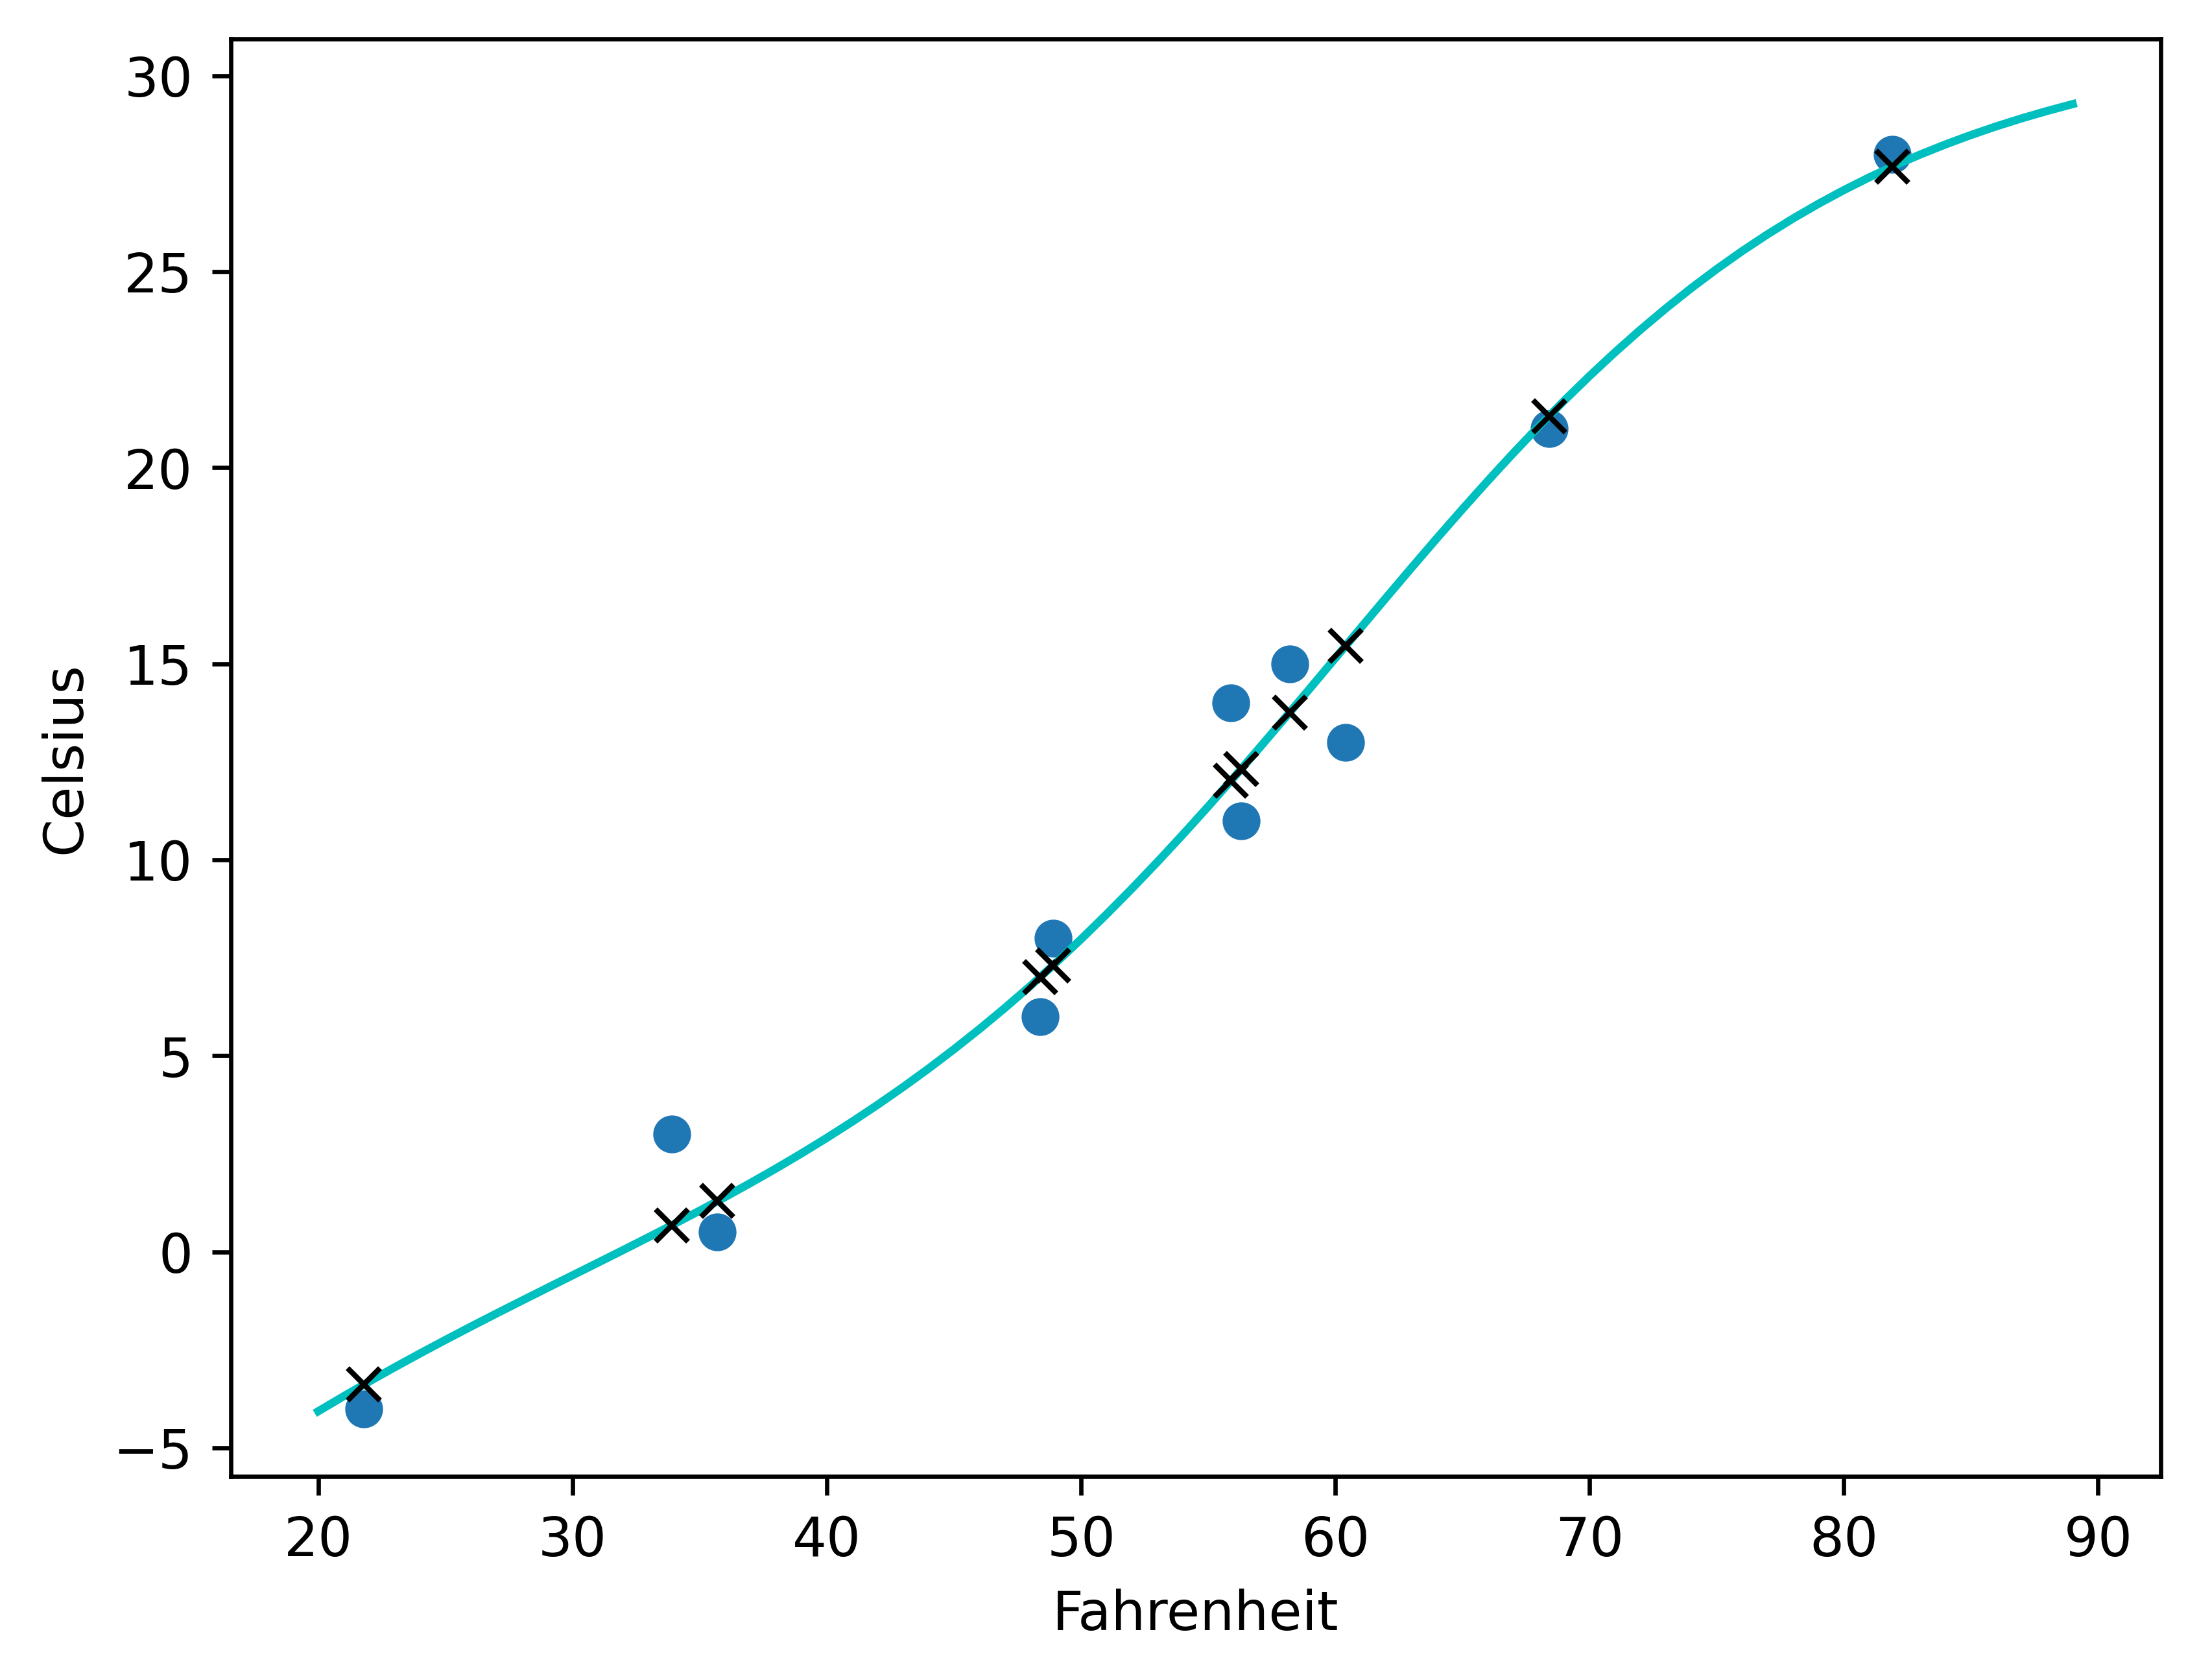

In [40]:
import matplotlib.pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u.unsqueeze(1)).detach().numpy(), 'kx')
